# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Explore the EEG Data

In [2]:
df = pd.read_csv('EEG-HAR_Subject_5_Merged.csv')
print("Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns:
['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Not Used 1', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Not Used 2', 'Digital Channel 4 (D18)', 'Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2', 'Timestamp', 'Marker Channel', 'Timestamp (Formatted)', 'Activity', 'Timestamp_Gyro', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Activity_Label_x', 'Subject_ID_x', 'Timestamp_Accel', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)', 'Activity_Label_y', 'Subject_ID_y']

First 5 rows:
   Sample Index  EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  \
0           6.0 -187500.022352 -187500.022352  -9568

# Count the Activity Labels

In [3]:
df = pd.read_csv('EEG-HAR_Subject_5_Merged.csv')
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
OpenBCISession_s5-marching in place            58499
OpenBCISession_s5-wall push-ups                57374
OpenBCISession_s5-standing heel to toe walk    15278
OpenBCISession_s5-seated boxing hooks          15162
Name: count, dtype: int64


# Extract EEG Data and Save to New File

In [4]:
df = pd.read_csv('EEG-HAR_Subject_5_Merged.csv')
eeg_columns = [f'EXG Channel {i}' for i in range(16)]
meta_columns = ['Subject_ID_x', 'Activity']
eeg_only_df = df[eeg_columns + meta_columns]
eeg_only_df.to_csv('EEG_Only_Subject5.csv', index=False)
print("Created: EEG_Only_Subject5.csv")
print(f"Shape: {eeg_only_df.shape}")
print(eeg_only_df.head())

Created: EEG_Only_Subject5.csv
Shape: (146313, 18)
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352  -95681.827746 -187500.022352  -79511.592330   
1 -187500.022352 -187500.022352  -95959.034080 -187500.022352  -79513.827504   
2 -187500.022352 -187500.022352  -95751.900465 -187500.022352  -79737.657873   
3 -187500.022352 -187500.022352  -95912.676562 -187500.022352  -79541.387205   
4 -187500.022352 -187500.022352  -95820.296803 -187500.022352  -79945.484393   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0  -63431.143872  -73532.500688 -187500.022352  -85267.680617  -34594.577205   
1  -63390.955435  -73657.648105 -187500.022352  -84424.729279  -34839.328806   
2  -63640.132682  -73717.282560 -187500.022352  -85352.103156  -34523.632768   
3  -63425.734750  -73720.881190 -187500.022352  -84548.423832  -34694.154226   
4  -63826.814452  -73858.836157 -187500.022352  -85439.744346  -3443

# Rename Columns and Save the Updated File

In [5]:
df = pd.read_csv('EEG_Only_Subject5.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df.to_csv('EEG_Only_Subject5.csv', index=False)
print("Columns renamed and file updated.")
print("Last 2 columns:", df.columns[-2:].tolist())
print("\nPreview of data:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns renamed and file updated.
Last 2 columns: ['Subject_ID', 'Activity_Label_OpenBCI']

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352  -95681.827746 -187500.022352  -79511.592330   
1 -187500.022352 -187500.022352  -95959.034080 -187500.022352  -79513.827504   
2 -187500.022352 -187500.022352  -95751.900465 -187500.022352  -79737.657873   
3 -187500.022352 -187500.022352  -95912.676562 -187500.022352  -79541.387205   
4 -187500.022352 -187500.022352  -95820.296803 -187500.022352  -79945.484393   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0  -63431.143872  -73532.500688 -187500.022352  -85267.680617  -34594.577205   
1  -63390.955435  -73657.648105 -187500.022352  -84424.729279  -34839.328806   
2  -63640.132682  -73717.282560 -187500.022352  -85352.103156  -34523.632768   
3  -63425.734750  -73720.881190 -187500.022352  -84548.423832  -34694.154226   
4  -63826.

# Display Unique Activity Labels

In [6]:
print(df['Activity_Label_OpenBCI'].unique())

['OpenBCISession_s5-marching in place' 'OpenBCISession_s5-wall push-ups'
 'OpenBCISession_s5-standing heel to toe walk'
 'OpenBCISession_s5-seated boxing hooks']


# Count Rows per Activity Label

In [7]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print("Number of rows per activity label:\n")
print(activity_counts)

Number of rows per activity label:

Activity_Label_OpenBCI
OpenBCISession_s5-marching in place            58499
OpenBCISession_s5-wall push-ups                57374
OpenBCISession_s5-standing heel to toe walk    15278
OpenBCISession_s5-seated boxing hooks          15162
Name: count, dtype: int64


# Plot Activity Counts

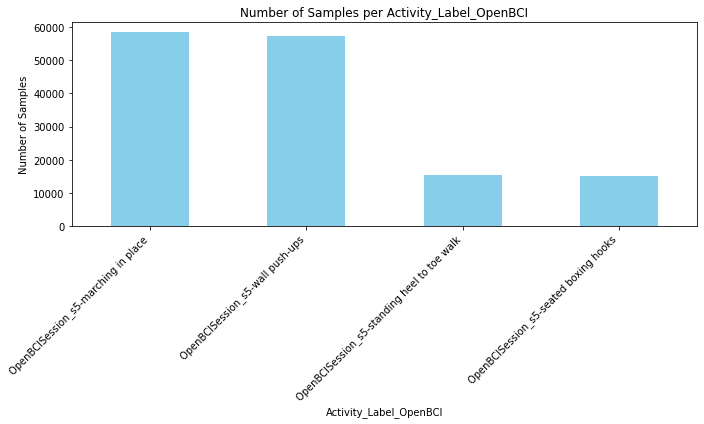

In [8]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Activity_Label_OpenBCI')
plt.xlabel('Activity_Label_OpenBCI')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Update Activity Labels and Save File

In [9]:
df = pd.read_csv('EEG_Only_Subject5.csv')

df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})

df['Subject_ID'] = df['Subject_ID'].replace('Subject 5', 5).astype(int)

activity_mapping = {
    'OpenBCISession_s5-marching in place': 'Marching in Place',
    'OpenBCISession_s5-wall push-ups': 'Wall Push-ups',
    'OpenBCISession_s5-seated boxing hooks': 'Seated Boxing Hooks',
    'OpenBCISession_s5-standing heel to toe walk': 'Standing Heel-to-Toe Walk'
}

df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping)

df.to_csv('EEG_Only_Subject5.csv', index=False)

print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now:")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_931451/4240445871.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subject_ID'] = df['Subject_ID'].replace('Subject 5', 5).astype(int)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now:
['Marching in Place' 'Wall Push-ups' 'Standing Heel-to-Toe Walk'
 'Seated Boxing Hooks']

Final shape: 146313 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352  -95681.827746 -187500.022352  -79511.592330   
1 -187500.022352 -187500.022352  -95959.034080 -187500.022352  -79513.827504   
2 -187500.022352 -187500.022352  -95751.900465 -187500.022352  -79737.657873   
3 -187500.022352 -187500.022352  -95912.676562 -187500.022352  -79541.387205   
4 -187500.022352 -187500.022352  -95820.296803 -187500.022352  -79945.484393   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0  -63431.143872  -73532.500688 -187500.022352  -85267.680617  -34594.577205   
1  -63390.955435  -73657.648105 -187500.022352  -84424.729279  -34839.328806   
2  -63640.132682  -73717.282560 -187500.022352  -

# Count the Activity Labels in Updated Data

In [10]:
df = pd.read_csv('EEG_Only_Subject5.csv')
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print(activity_counts)

Activity_Label_OpenBCI
Marching in Place            58499
Wall Push-ups                57374
Standing Heel-to-Toe Walk    15278
Seated Boxing Hooks          15162
Name: count, dtype: int64


# Map Activity Labels to Numeric Values and Save File

In [11]:
df = pd.read_csv('EEG_Only_Subject5.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df['Subject_ID'] = df['Subject_ID'].replace('Subject 5', 5).astype(int)

activity_mapping_to_numeric = {
    'Marching in Place': 2,
    'Wall Push-ups': 3,
    'Seated Boxing Hooks': 4,
    'Standing Heel-to-Toe Walk': 5
}

df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)
df.to_csv('EEG_Only_Subject5_Updated.csv', index=False)

print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now (numeric):")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_931451/1192825160.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now (numeric):
[2 3 5 4]

Final shape: 146313 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352  -95681.827746 -187500.022352  -79511.592330   
1 -187500.022352 -187500.022352  -95959.034080 -187500.022352  -79513.827504   
2 -187500.022352 -187500.022352  -95751.900465 -187500.022352  -79737.657873   
3 -187500.022352 -187500.022352  -95912.676562 -187500.022352  -79541.387205   
4 -187500.022352 -187500.022352  -95820.296803 -187500.022352  -79945.484393   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0  -63431.143872  -73532.500688 -187500.022352  -85267.680617  -34594.577205   
1  -63390.955435  -73657.648105 -187500.022352  -84424.729279  -34839.328806   
2  -63640.132682  -73717.282560 -187500.022352  -85352.103156  -34523.632768   
3  -63425.734750  -73720.881190 -18750

# Count and Sort Activity Labels (Numeric)

In [12]:
df = pd.read_csv('EEG_Only_Subject5_Updated.csv')

activity_counts = df['Activity_Label_OpenBCI'].value_counts().sort_index()

print("Unique activity labels and their counts (sorted 2 → 5):")
print(activity_counts)
print(f"\nTotal count: {activity_counts.sum()}")

Unique activity labels and their counts (sorted 2 → 5):
Activity_Label_OpenBCI
2    58499
3    57374
4    15162
5    15278
Name: count, dtype: int64

Total count: 146313
